# Delivery Time Assignment

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smf

## Loading the dataset

In [2]:
data = pd.read_csv("delivery_time.csv")

## Data Understanding

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.shape

(21, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


## There is a high correlation between feature and target

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Visualising Feature and Target

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

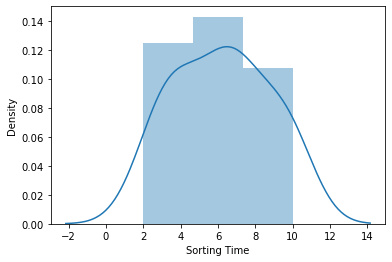

In [11]:
import seaborn as sns
sns.distplot(data['Sorting Time']) # In seaborn, histogram is called as distplot 

<AxesSubplot:xlabel='Sorting Time'>

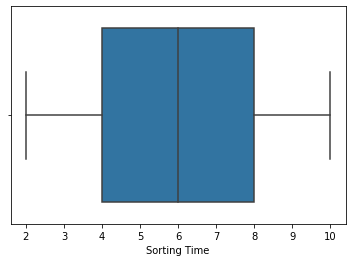

In [12]:
sns.boxplot(data['Sorting Time'])

## Sorting Time is normally distributed.

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

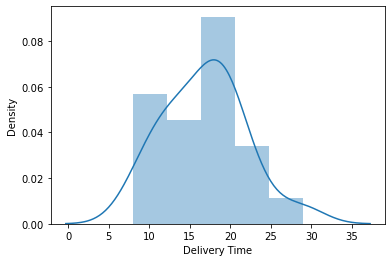

In [15]:
sns.distplot(data['Delivery Time']) 

In [21]:
df = np.sqrt(data['Delivery Time'])

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

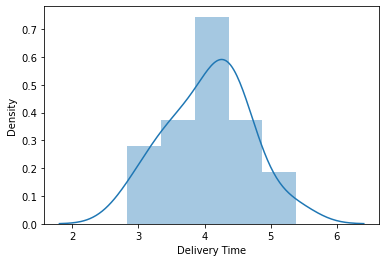

In [22]:
sns.distplot(df2)

## By applying Sqrt to column Delivery Time, data is distributed better and near to normally distributed

## Prepairing a model and predicting a values

In [23]:
# Following the regression equation, our dependent variable (y) is the delivery Time
y = data['Delivery Time']
# Similarly, our independent variable (x) is the Sorting Time
x1 = data['Sorting Time']

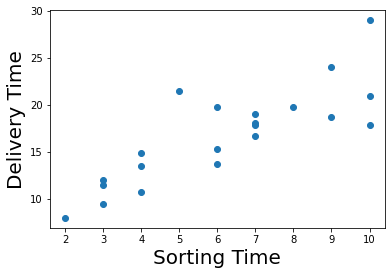

In [24]:
plt.scatter(x1,y)
# Name the axes
plt.xlabel('Sorting Time', fontsize = 20)
plt.ylabel('Delivery Time', fontsize = 20)
# Show the plot
plt.show()

In [27]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = smf.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = smf.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 20 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        09:32:57   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# p value of sorting time is less than 0.01 it means feature is important

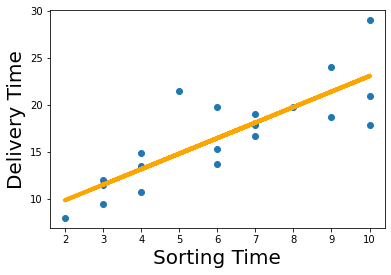

In [29]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 1.6490*x1 + 6.5827
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('Sorting Time', fontsize = 20)
plt.ylabel('Delivery Time', fontsize = 20)
plt.show()

In [31]:
# Checking our predictions
yhat

0     23.0727
1     13.1787
2     16.4767
3     21.4237
4     23.0727
5     16.4767
6     18.1257
7     11.5297
8     23.0727
9     21.4237
10    19.7747
11    13.1787
12    18.1257
13    11.5297
14    11.5297
15    13.1787
16    16.4767
17    18.1257
18     9.8807
19    18.1257
20    14.8277
Name: Sorting Time, dtype: float64

In [34]:
#Predict for 15 and 17 sorting time
newdata=pd.Series([15,17])

In [35]:
data_pred=pd.DataFrame(newdata,columns=['Sorting Time'])

In [36]:
data_pred

,Sorting Time
0,15
1,17
